In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score,classification_report,precision_score,recall_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
house = pd.DataFrame(pd.read_csv("G:\Projects\House Price Prediction\Housing.csv"))

In [3]:
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Data Inspection

In [4]:
house.shape

(545, 13)

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
house.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
house.isnull().sum()*100/house.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

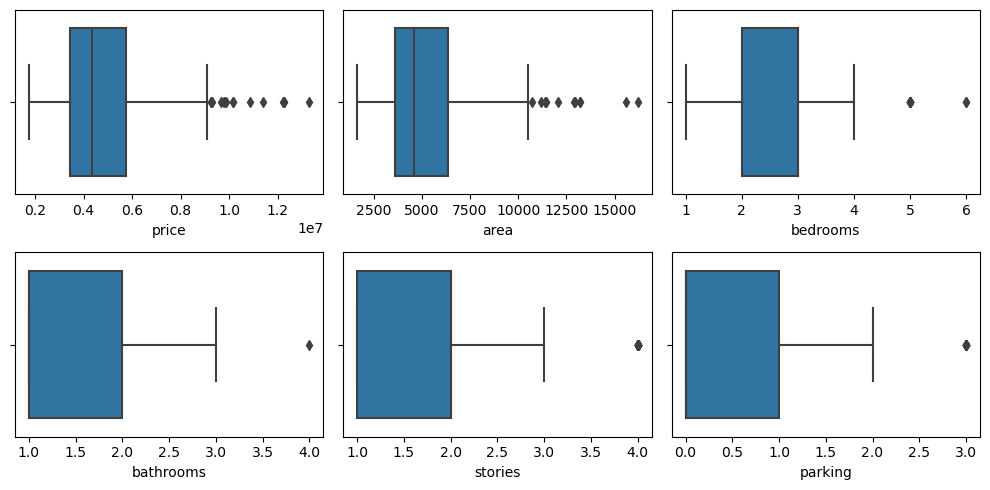

In [8]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(house['price'], ax = axs[0,0])
plt2 = sns.boxplot(house['area'], ax = axs[0,1])
plt3 = sns.boxplot(house['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(house['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(house['stories'], ax = axs[1,1])
plt3 = sns.boxplot(house['parking'], ax = axs[1,2])

plt.tight_layout()

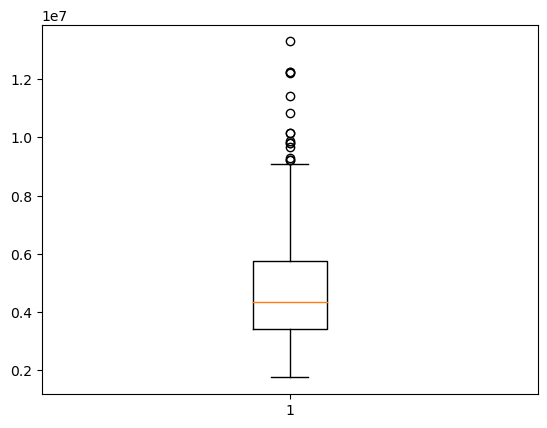

In [9]:
# outlier treatment for price
plt.boxplot(house.price)
Q1 = house.price.quantile(0.25)
Q3 = house.price.quantile(0.75)
IQR = Q3 - Q1
house = house[(house.price >= Q1 - 1.5*IQR) & (house.price <= Q3 + 1.5*IQR)]

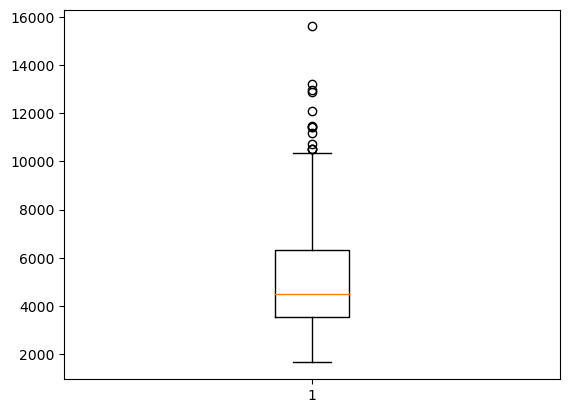

In [10]:
# outlier treatment for area
plt.boxplot(house.area)
Q1 = house.area.quantile(0.25)
Q3 = house.area.quantile(0.75)
IQR = Q3 - Q1
house = house[(house.area >= Q1 - 1.5*IQR) & (house.area <= Q3 + 1.5*IQR)]

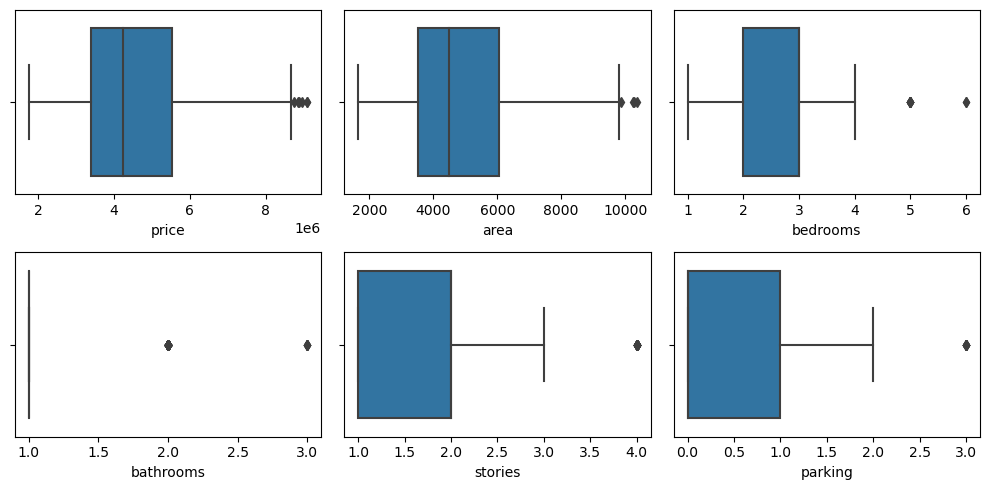

In [11]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(house['price'], ax = axs[0,0])
plt2 = sns.boxplot(house['area'], ax = axs[0,1])
plt3 = sns.boxplot(house['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(house['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(house['stories'], ax = axs[1,1])
plt3 = sns.boxplot(house['parking'], ax = axs[1,2])

plt.tight_layout()

# EDA

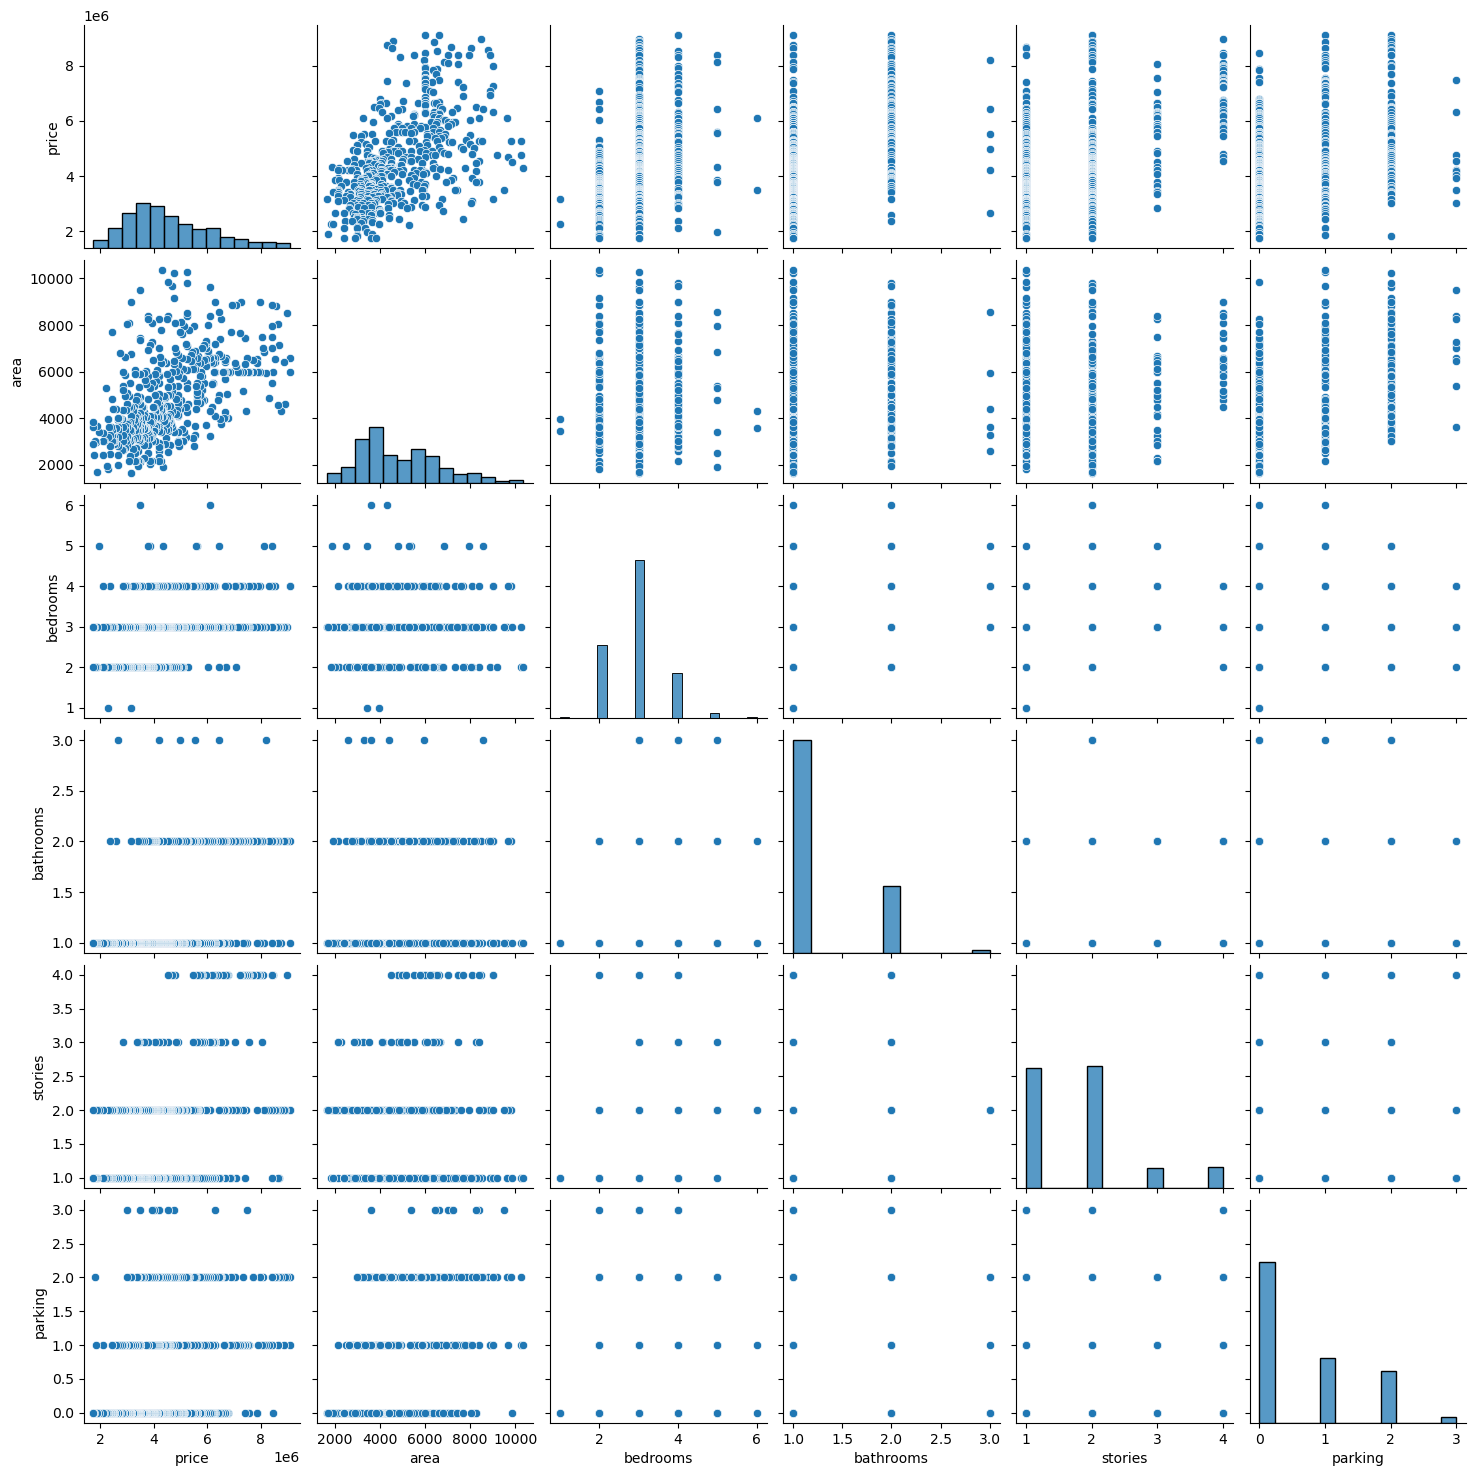

In [12]:
sns.pairplot(house)
plt.show()

# Visualising Categorical Variables

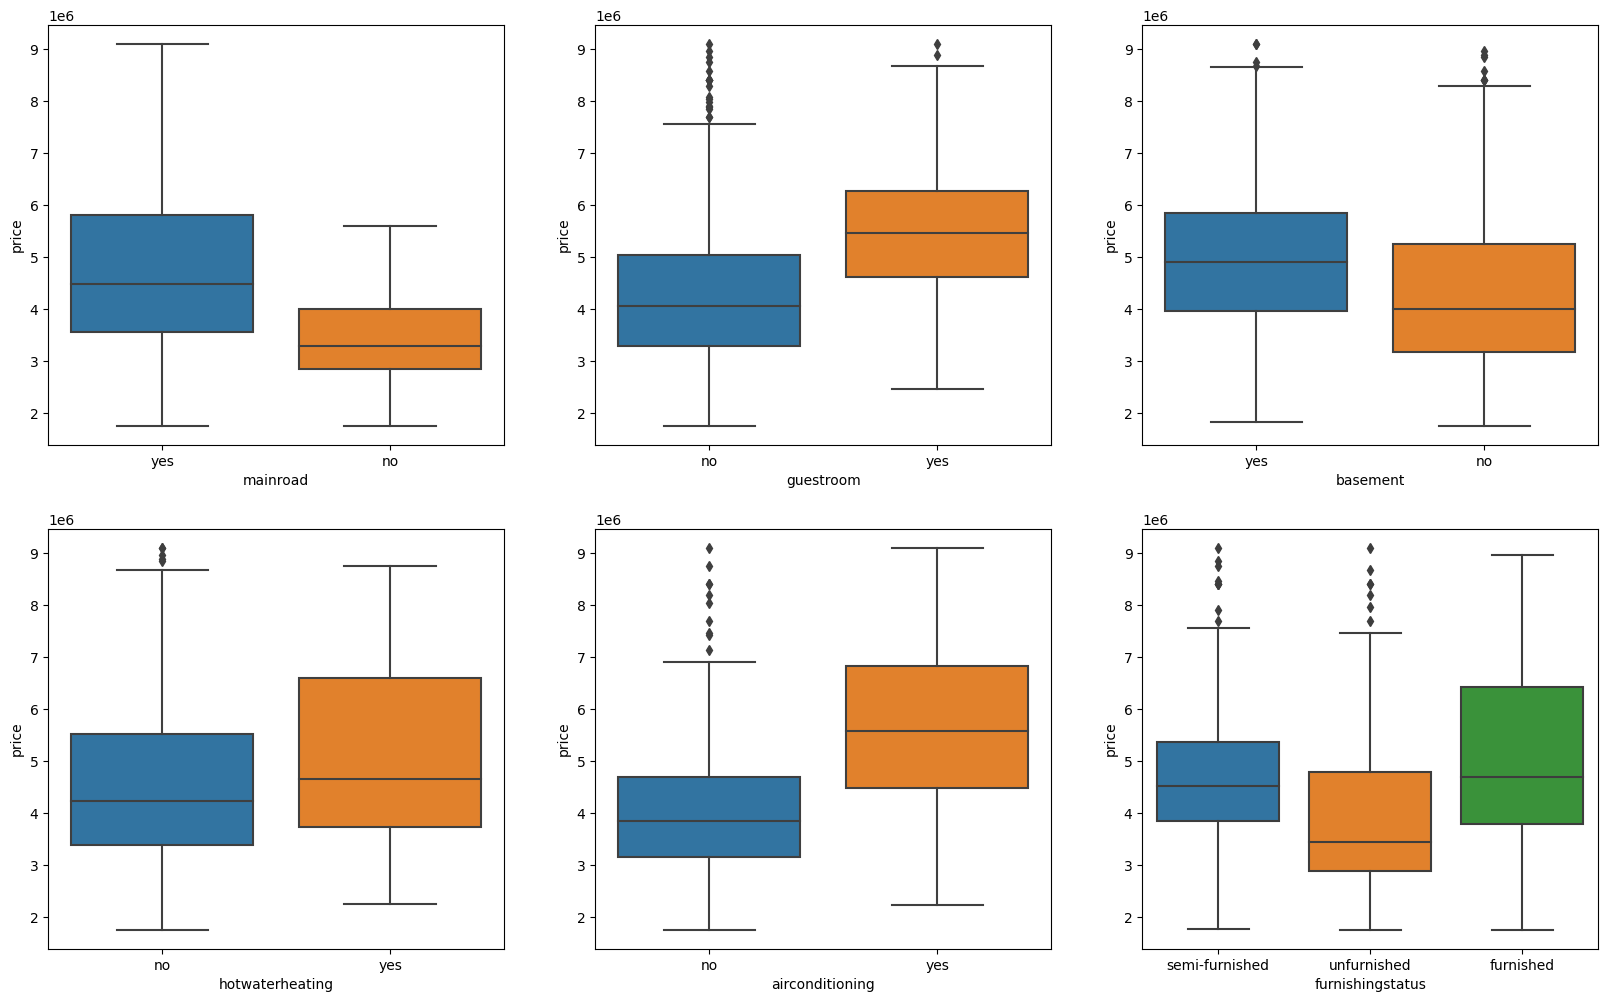

In [13]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = house)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = house)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = house)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = house)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = house)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = house)
plt.show()

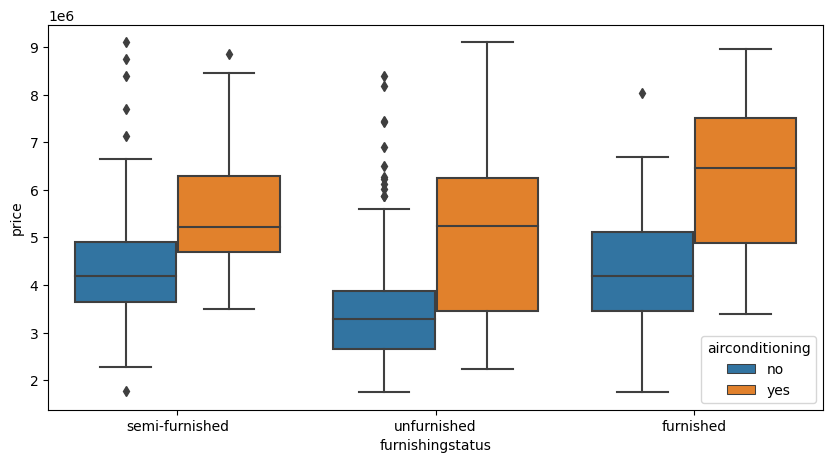

In [14]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = house)
plt.show()

<AxesSubplot:>

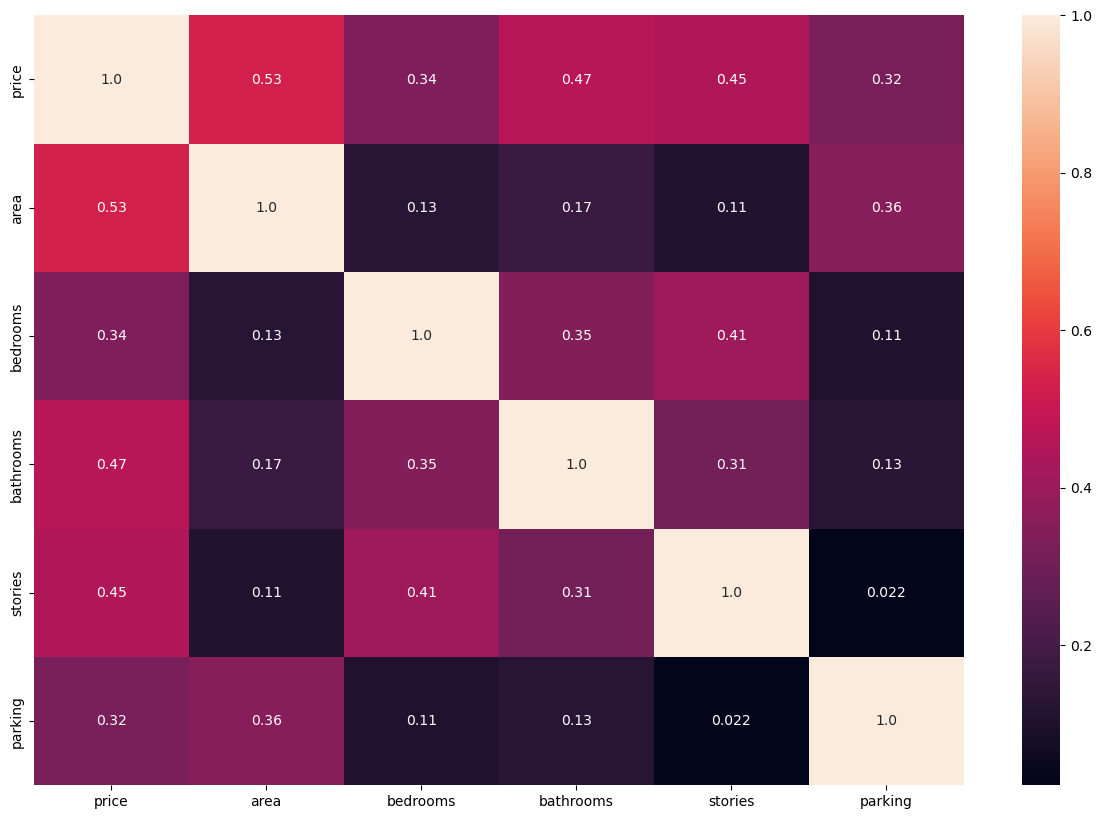

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(house.corr(),annot=True,fmt='.2')

# Model Building Using LR

In [16]:
x = house['price']
y = house['parking']

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,train_size = 0.7,  test_size = 0.3, random_state =100)

In [18]:
x_train.head()

148    5600000
236    4620000
356    3773000
425    3360000
516    2450000
Name: price, dtype: int64

In [19]:
y_train.head()

148    0
236    0
356    1
425    2
516    1
Name: parking, dtype: int64

# house price vs area

In [20]:
x = house['price']
y = house['area']

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,train_size = 0.7,  test_size = 0.3, random_state =100)

In [22]:
x_train.head()

148    5600000
236    4620000
356    3773000
425    3360000
516    2450000
Name: price, dtype: int64

In [23]:
y_train.head()

148    6360
236    2870
356    2520
425    3185
516    3240
Name: area, dtype: int64

# Building a Linear Model (Add a constant to get an intercept & Ordinary Least Squares)

In [24]:
import statsmodels.api as sm

In [25]:
x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_sm).fit()

# the intercept and the slope of the regression line fitted

In [26]:
lr.params

const    1951.598358
price       0.000637
dtype: float64

In [27]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot')


<AxesSubplot:xlabel='price', ylabel='parking'>

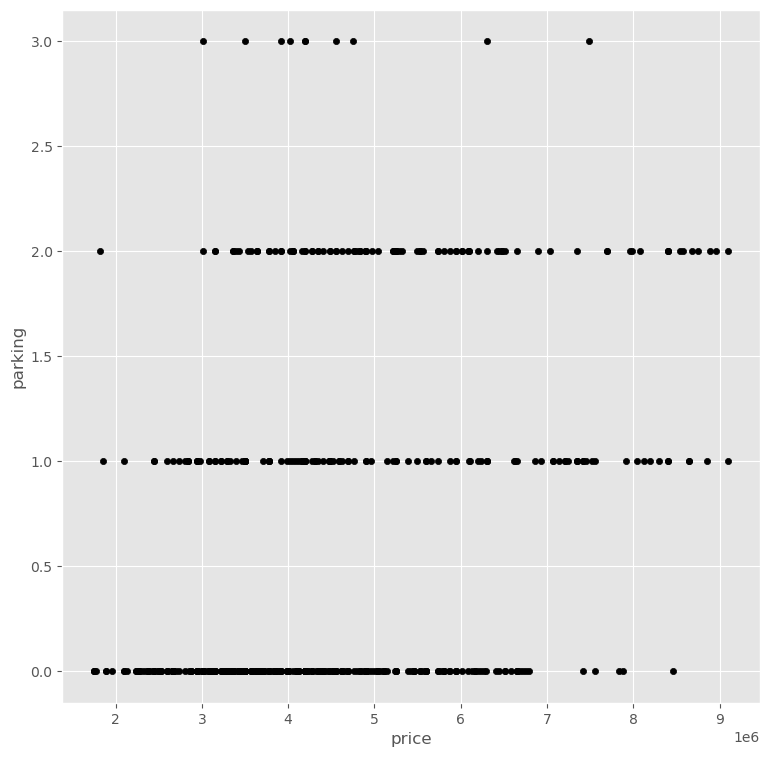

In [28]:
house.plot(kind="scatter", x='price', y='parking', figsize=(9,9), color="black")

<AxesSubplot:xlabel='price', ylabel='area'>

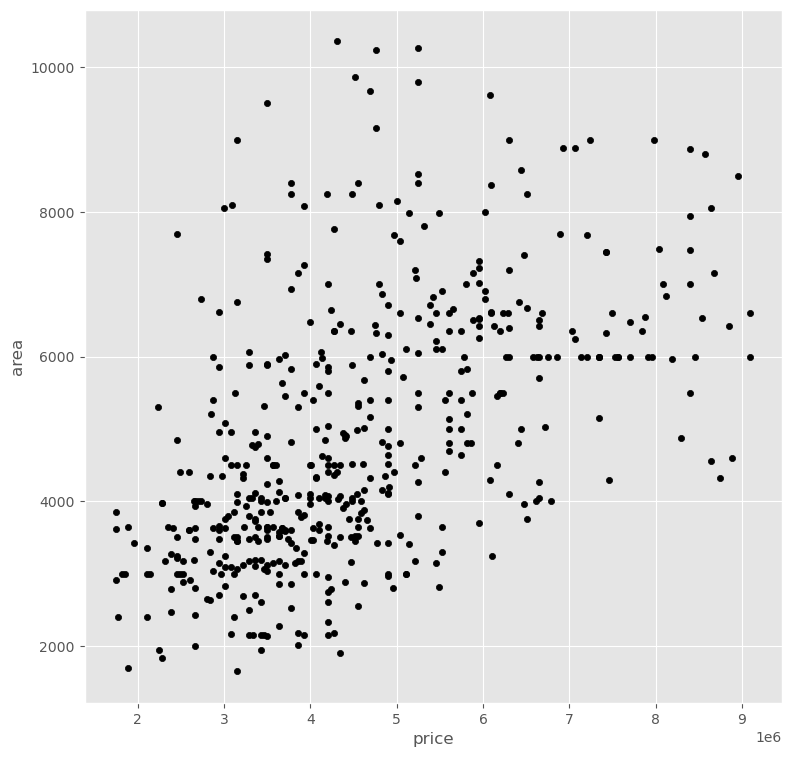

In [29]:
house.plot(kind="scatter", x='price', y='area', figsize=(9,9), color="black")

In [30]:
from sklearn import linear_model

In [31]:
regression_model = linear_model.LinearRegression()

regression_model.fit(X=pd.DataFrame(house["price"]),y=(house["parking"]))

print(regression_model.intercept_)

print(regression_model.coef_)


-0.12194284427294488
[1.69782476e-07]


In [32]:
regression_model = linear_model.LinearRegression()

regression_model.fit(X=pd.DataFrame(house["price"]),y=(house["area"]))

print(regression_model.intercept_)

print(regression_model.coef_)


2172.4653160436924
[0.00059482]


# model score

In [33]:
regression_model.score(X=pd.DataFrame(house["price"]),y=(house["parking"]))

-34940058.903787255

In [34]:
regression_model.score(X=pd.DataFrame(house["price"]),y=(house["area"]))

0.2842869261384021

# The R-squaredd measure

In [35]:
train_prediction = regression_model.predict(X=pd.DataFrame(house["price"]))

residuals = house["price"] - train_prediction

residuals.describe()

count    5.170000e+02
mean     4.563983e+06
std      1.593878e+06
min      1.746787e+06
25%      3.390808e+06
50%      4.230308e+06
75%      5.524538e+06
max      9.092415e+06
Name: price, dtype: float64

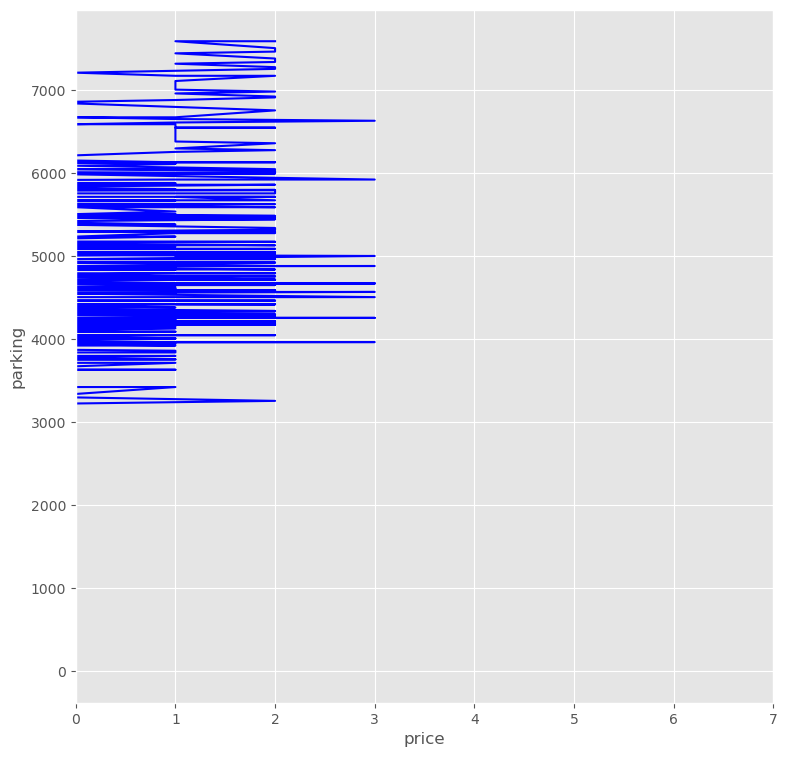

In [36]:
house.plot(kind="scatter",x="price",y="parking",figsize=(9,9),color="black",xlim=(0,7))

plt.plot(house["parking"],
        train_prediction,
        color="blue");

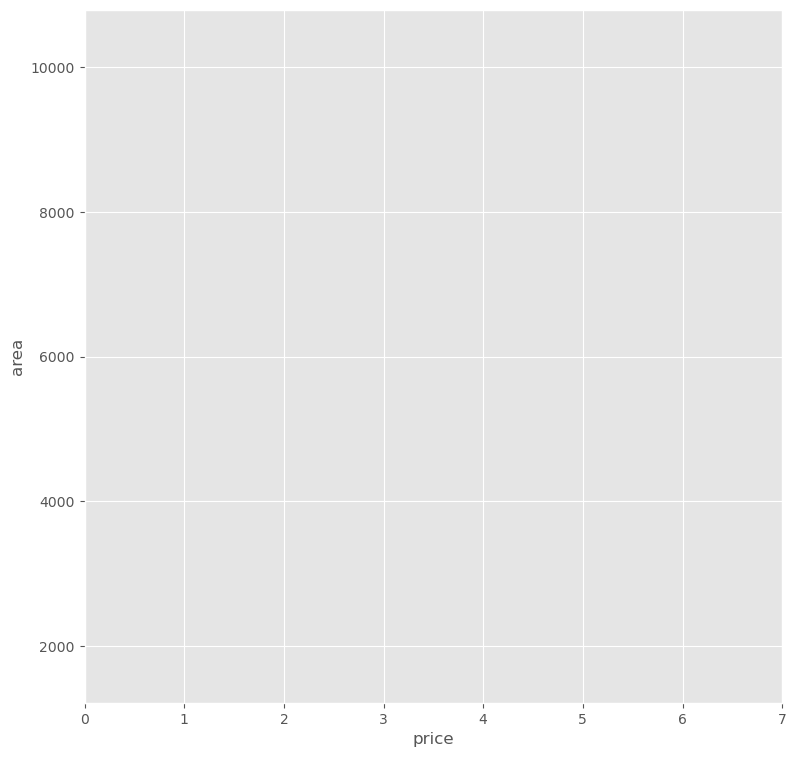

In [37]:
house.plot(kind="scatter",x="price",y="area",figsize=(9,9),color="black",xlim=(0,7))

plt.plot(house["area"],
        train_prediction,
        color="yellow");